In [37]:
import pandas as pd 

In [38]:
movies=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FSDS2025\archive\movie.csv")

In [39]:
print(movies.shape)
print(type(movies))
print(movies.head())

(27278, 3)
<class 'pandas.core.frame.DataFrame'>
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [40]:
tags=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FSDS2025\archive\tag.csv")

In [41]:
print(tags.shape)
print(type(tags))
print(tags.head())

(465564, 4)
<class 'pandas.core.frame.DataFrame'>
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18


In [34]:
ratings=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FSDS2025\archive\rating.csv")

In [42]:
print(ratings.shape)
print(type(ratings))
print(ratings.head())

(20000263, 3)
<class 'pandas.core.frame.DataFrame'>
   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5


In [45]:
ratings.drop(columns='timestamp', inplace=True, errors='ignore')
tags.drop(columns='timestamp', inplace=True, errors='ignore')


# Data Structures

# Series

In [46]:
row_0=tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [47]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [48]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [49]:
row_0['userId']

np.int64(18)

In [50]:
'rating' in row_0

False

In [51]:
row_0.name

0

In [53]:
row_0=row_0.rename('firstRow')

# DataFrames

In [59]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [60]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [61]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [62]:
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


# Descriptive Statistics

In [63]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [64]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [65]:
rating['rating'].mean()

np.float64(3.5255285642993797)

In [66]:
ratings.median()

userId     69141.0
movieId     2167.0
rating         3.5
dtype: float64

In [67]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [68]:
ratings['rating'].min()

np.float64(0.5)

In [69]:
ratings['rating'].max()

np.float64(5.0)

In [70]:
ratings['rating'].std()

np.float64(1.0519889192942418)

In [73]:
ratings.corr

<bound method DataFrame.corr of           userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[20000263 rows x 3 columns]>

In [75]:
filter1=ratings['rating']>10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


np.False_

In [76]:
filter2=ratings['rating']>0
filter2.all()

np.True_

# Data Cleaning:Handling Missing Values

In [78]:
movies.shape

(27278, 3)

In [81]:
movies.isnull().any().any()

np.False_

In [87]:
ratings.shape

(20000263, 3)

In [90]:
ratings.isnull().any().any()

np.False_

In [91]:
tags.shape

(465564, 3)

In [92]:
tags.isnull().any().any()

np.True_

In [93]:
tags=tags.dropna()

In [94]:
tags.isnull().any().any()

np.False_

In [95]:
tags.shape

(465548, 3)

# Data Visualization

In [100]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

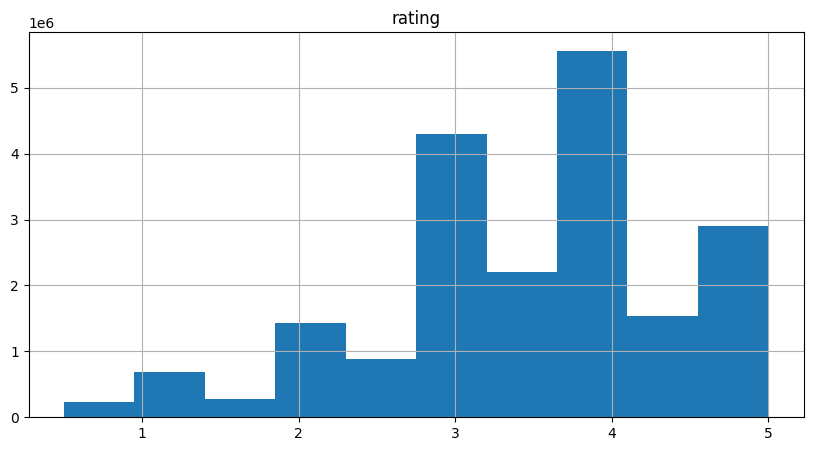

In [101]:
%matplotlib inline
ratings.hist(column='rating',figsize=(10,5))

<Axes: >

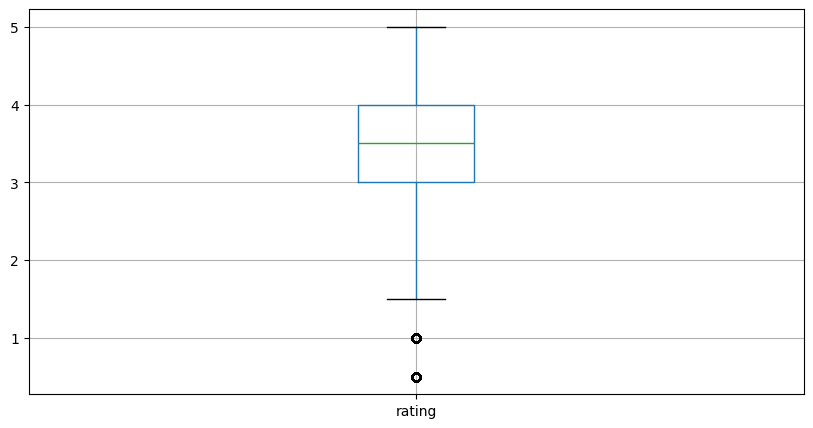

In [104]:
ratings.boxplot(column='rating', figsize=(10,5))

# Slicing Out Columns

In [105]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [106]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [107]:
ratings[:-10]

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000248,138493,58879,4.5
20000249,138493,59315,4.0
20000250,138493,59725,3.0
20000251,138493,59784,5.0


In [108]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [109]:
tag_counts=tags['tag'].value_counts()
tag_counts[-10:]

tag
Hell naw                      1
This is my happy face         1
I heel toe on Uday's house    1
Why?                          1
Bobo                          1
Diamond Dallas Page           1
I'm Devon Butler!             1
No arguement                  1
Really Bad                    1
Botox                         1
Name: count, dtype: int64

<Axes: xlabel='tag'>

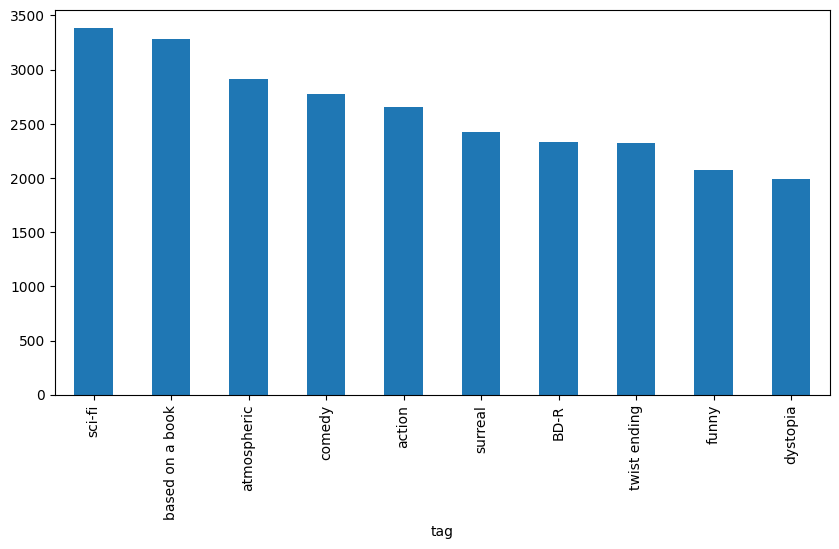

In [120]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

# Filters for Selecting Rows

In [124]:
is_highly_rated=ratings['rating']>=5.0
rating[is_highly_rated][30:50]

,userId,movieId,rating,timestamp
239,3,50,5.0,1999-12-11 13:13:38
242,3,175,5.0,1999-12-11 13:32:13
244,3,223,5.0,1999-12-11 13:20:44
245,3,260,5.0,1999-12-11 13:09:02
246,3,316,5.0,1999-12-14 12:51:10
247,3,318,5.0,1999-12-11 13:09:26
248,3,329,5.0,1999-12-14 12:53:41
252,3,457,5.0,1999-12-11 13:16:55
253,3,480,5.0,1999-12-14 12:50:20
254,3,490,5.0,1999-12-11 13:30:41


In [127]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [126]:
is_action=movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [128]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


# Group By and Aggregate

In [129]:
ratings_count=ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [134]:
avg_rating=ratings[['movieId','rating']].groupby('movieId').mean()
avg_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [135]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [138]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


# Merge Datafremes

In [139]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [140]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [141]:
t=movies.merge(tags,on='movieId',how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


# Combine,aggregation,merging,and filters to get useful anlytics

In [147]:
avg_ratings=ratings.groupby('movieId',as_index=False).mean()
del avg_ratings['userId']                           
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [148]:
box_office=movies.merge(avg_ratings,on='movieId',how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [149]:
is_highly_rated=box_office['rating']>=4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [150]:
is_adventure=box_office['genres'].str.contains('Adventure')
box_office[is_adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [151]:
box_office[is_adventure&is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


# Vectorized String Operations

In [153]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Split 'genres' into multiple columns

In [154]:
movie_games=movies['genres'].str.split('|',expand=True)

In [158]:
movie_games[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


# Add a new colummn for comedy genre flag

In [160]:
movie_games['isComedy']=movies['genres'].str.contains('Comedy')


In [162]:
movie_games[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


# Extract year from title

In [163]:
movies['year']=movies['title'].str.extract('.*\((.*)\).',expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\HP\AppData\Local\Temp\ipykernel_10576\4179510367.py:1: SyntaxWarning: invalid escape sequence '\('
  movies['year']=movies['title'].str.extract('.*\((.*)\).',expand=True)


In [164]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,NaN
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,NaN
27275,131258,The Pirates (2014),Adventure,NaN
27276,131260,Rentun Ruusu (2001),(no genres listed),NaN
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,NaN


# Parsing Timestamps

In [181]:
tags=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\FSDS2025\archive\tag.csv",sep=',')

In [182]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [183]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [184]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')


ValueError: non convertible value 2009-04-24 18:19:40 with the unit 's', at position 0

In [185]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'])


In [186]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [189]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18


In [190]:
greater_than_t=tags['parsed_time']>'2015-02-01'
selected_rows=tags[greater_than_t]
tags.shape,selected_rows.shape

((465564, 5), (12130, 5))

In [191]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02


# Average Movie Ratings over Time

In [192]:
avg_rating=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [208]:
joined = movies.merge(average_rating, on='movieId', how='inner')

In [209]:
print(joined)
print(joined.corr(numeric_only=True))

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
26739   131254        Kein Bund für's Leben (2007)   
26740   131256       Feuer, Eis & Dosenbier (2002)   
26741   131258                  The Pirates (2014)   
26742   131260                 Rentun Ruusu (2001)   
26743   131262                    Innocence (2014)   

                                            genres year  average_rating  
0      Adventure|Animation|Children|Comedy|Fantasy  NaN        3.921240  
1                       Adventure|Children|Fantasy  NaN        3.211977  
2                                   Comedy|Romance  NaN        3.151040  
3                             Comedy|Drama|Romance  NaN

In [210]:
joined = movies.merge(average_rating, on='movieId', how='inner')  # Merging the data   

In [211]:
print(joined.head())   # View first 5 rows (optional)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres year  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy  NaN        3.921240  
1                   Adventure|Children|Fantasy  NaN        3.211977  
2                               Comedy|Romance  NaN        3.151040  
3                         Comedy|Drama|Romance  NaN        2.861393  
4                                       Comedy  NaN        3.064592  


In [212]:
print(joined.corr(numeric_only=True))   # Calculate correlation only for numeric columns

                 movieId  average_rating
movieId         1.000000       -0.090369
average_rating -0.090369        1.000000


In [213]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr(numeric_only=True)

,movieId,average_rating
movieId,1.000000,-0.090369
average_rating,-0.090369,1.000000
